# Hierarchical Clustering

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../songs_longtexts.csv")

In [3]:
data1 = df[df['artist'] == 'Eminem']
data2 = df[df['artist'] == 'ABBA']

In [4]:
data1 = df[df['Genre1'] == 'Hip Hop']
data2 = df[df['Genre1'] == 'Latin']

In [5]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.POS)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [6]:
data

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
1080,2806,25 to Life,Eminem,/e/eminem/25+to+life_20883525.html,too late for the other side caught in a chase...,too late for the other side caught in a chase...,late other other devoted fucking baggy fucking...,"['RB', 'JJ', 'IN', 'DT', 'JJ', 'NN', '_SP', 'V...",Hip Hop,Electronic,detroit hip hop,g funk,687.0,295.0,2010,2010s
1081,2807,3 A.M.,Eminem,/e/eminem/3+am_20789506.html,oh oh oh yea oh yea oh yea oh oh oh oh ...,oh oh oh yea oh yea oh yea oh oh oh oh yea oh...,good good horrible deep next sure naked dead c...,"['UH', 'UH', '_SP', 'UH', 'UH', '_SP', 'UH', '...",Hip Hop,Electronic,detroit hip hop,g funk,696.0,354.0,2009,2000s
1082,2808,Buffalo Bill,Eminem,/e/eminem/buffalo+bill_20866830.html,it fits perfect better watch out sucka now ...,it fit perfect better watch out sucka now i g...,perfect full ja- ra- polegic lohan naked such ...,"['PRP', 'VBZ', 'JJ', '_SP', 'RBR', 'VB', 'RP',...",Hip Hop,Electronic,detroit hip hop,g funk,537.0,342.0,2009,2000s
1083,2809,Business,Eminem,/e/eminem/business_10106011.html,marshall sounds like an s.o.s. holy whack un...,marshal sound like an s.o. . holi whack unlyr...,unlyrical mobile further 'bout flawless honest...,"['NNP', '_SP', 'VBZ', 'IN', 'DT', 'NN', '.', '...",Hip Hop,Electronic,detroit hip hop,g funk,583.0,373.0,2002,2000s
1084,2810,Careful What You Wish For,Eminem,/e/eminem/careful+what+you+wish+for_20793604.html,so this is it this is what i wished for just...,so thi is it thi is what i wish for just is n...,different little green slim classic fantastic ...,"['CC', 'DT', 'VBZ', 'PRP', '_SP', 'DT', 'VBZ',...",Hip Hop,Electronic,detroit hip hop,g funk,566.0,241.0,2009,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,12888,I Wanna Be Your Lover,Yo La Tengo,/y/yo+la+tengo/i+wanna+be+your+lover_20740762....,well the rainman comes with his magic wand a...,well the rainman come with hi magic wand and ...,magic mad cute mad bad dignified obvious rainm...,"['UH', '_SP', 'DT', 'NN', 'VBZ', 'IN', 'PRP$',...",Latin,Rock,alternative rock,anti-folk,234.0,94.0,2007,2000s
5091,12898,Nothing But You And Me,Yo La Tengo,/y/yo+la+tengo/nothing+but+you+and+me_20531730...,well i don't care what's wrong or right when...,well i do n't care what 's wrong or right whe...,wrong right bad true lonely bad bad bad side n...,"['UH', '_SP', 'PRP', 'VBP', 'RB', 'VB', 'WP', ...",Latin,Rock,alternative rock,anti-folk,274.0,99.0,2003,2000s
5092,12899,Ohm,Yo La Tengo,/y/yo+la+tengo/ohm_21053737.html,sometimes the bad guys go right on top someti...,sometim the bad guy go right on top sometim t...,bad top good bad good same good fun right good...,"['RB', 'DT', 'JJ', 'NNS', 'VBP', 'RB', 'IN', '...",Latin,Rock,alternative rock,anti-folk,251.0,94.0,2013,2010s
13210,33440,Season Of The Shark,Yo La Tengo,/y/yo+la+tengo/season+of+the+shark_20531724.html,you need someone to hide behind i don't mind ...,you need someon to hide behind i do n't mind ...,alone alright alright hard wrong low bad short...,"['PRP', 'VBP', 'NN', 'TO', 'VB', 'RB', '_SP', ...",Latin,Rock,alternative rock,anti-folk,227.0,106.0,2003,2000s


In [7]:
def linkage_matrix(n_samples, children, distances):
    """
    create a linkage matrix for the dendogram method in scipy
    n_samples: int, number of samples
    children: list of lists, clustered data points (should be 2)
    distances: list of distances between nodes
    """
    # Create linkage matrix
    

    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([children, distances, counts]).astype(float)

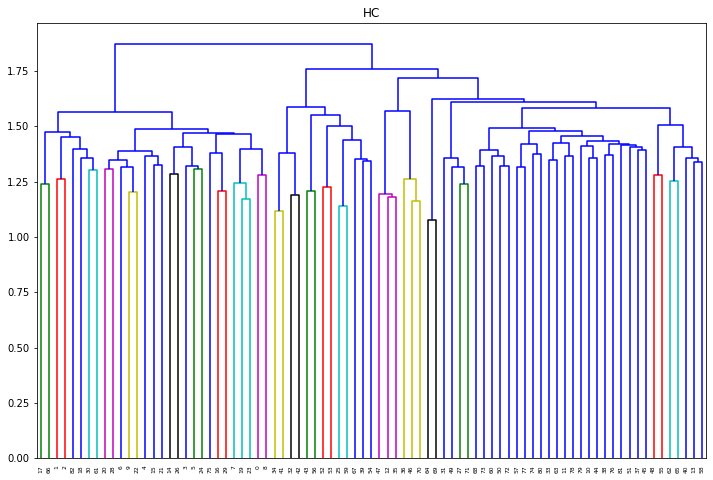

In [89]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
plt.figure(figsize=(12,8))
plt.title('HC')

dendrogram(link_matrix);
plt.savefig('../images/HC/hc_eminem_abba.png', bbox_inches = "tight")

In [8]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'ro', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

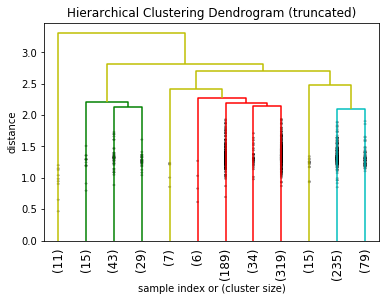

In [15]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
fancy_dendrogram(
    link_matrix,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True,
    annotate_above=10  # useful in small plots so annotations don't overlap
)
plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

In [12]:
def augmented_dendrogram(*args, **kwargs):
    
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro', c = c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

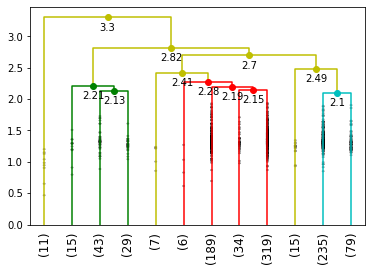

In [14]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
Z = linkage(tf_idf_array, 'ward')
augmented_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    above_threshold_color='y',
    show_contracted=True)
plt.savefig('../images/HC/hc_latin_hiphop.png', bbox_inches = "tight")
plt.show()

In [139]:
Z = linkage(tf_idf_array, 'ward')
Z[:20]

array([[4.28000000e+02, 5.79000000e+02, 4.66649503e-01, 2.00000000e+00],
       [7.78000000e+02, 7.79000000e+02, 6.15168343e-01, 2.00000000e+00],
       [2.39000000e+02, 9.82000000e+02, 6.50724643e-01, 3.00000000e+00],
       [4.09000000e+02, 5.80000000e+02, 6.94752655e-01, 2.00000000e+00],
       [7.14000000e+02, 7.19000000e+02, 7.95616619e-01, 2.00000000e+00],
       [7.75000000e+02, 8.66000000e+02, 8.29488222e-01, 2.00000000e+00],
       [3.24000000e+02, 6.71000000e+02, 8.50526308e-01, 2.00000000e+00],
       [6.82000000e+02, 6.87000000e+02, 8.56495952e-01, 2.00000000e+00],
       [2.90000000e+02, 5.78000000e+02, 8.69025799e-01, 2.00000000e+00],
       [3.41000000e+02, 4.02000000e+02, 8.70202274e-01, 2.00000000e+00],
       [1.59000000e+02, 9.77000000e+02, 8.85721802e-01, 2.00000000e+00],
       [6.91000000e+02, 9.84000000e+02, 9.03952944e-01, 4.00000000e+00],
       [7.30000000e+02, 9.86000000e+02, 9.09266209e-01, 3.00000000e+00],
       [8.91000000e+02, 9.61000000e+02, 9.15191540e

In [141]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(tf_idf_array)
link_matrix = linkage_matrix(tf_idf_array.shape[0], model.children_, model.distances_)
link_matrix[:20]

array([[4.28000000e+02, 5.79000000e+02, 4.66649503e-01, 2.00000000e+00],
       [7.78000000e+02, 7.79000000e+02, 6.15168343e-01, 2.00000000e+00],
       [2.39000000e+02, 9.82000000e+02, 6.50724643e-01, 3.00000000e+00],
       [4.09000000e+02, 5.80000000e+02, 6.94752655e-01, 2.00000000e+00],
       [7.14000000e+02, 7.19000000e+02, 7.95616619e-01, 2.00000000e+00],
       [7.75000000e+02, 8.66000000e+02, 8.29488222e-01, 2.00000000e+00],
       [3.24000000e+02, 6.71000000e+02, 8.50526308e-01, 2.00000000e+00],
       [6.82000000e+02, 6.87000000e+02, 8.56495952e-01, 2.00000000e+00],
       [2.90000000e+02, 5.78000000e+02, 8.69025799e-01, 2.00000000e+00],
       [3.41000000e+02, 4.02000000e+02, 8.70202274e-01, 2.00000000e+00],
       [1.59000000e+02, 9.77000000e+02, 8.85721802e-01, 2.00000000e+00],
       [6.91000000e+02, 9.84000000e+02, 9.03952944e-01, 4.00000000e+00],
       [7.30000000e+02, 9.86000000e+02, 9.09266209e-01, 3.00000000e+00],
       [8.91000000e+02, 9.61000000e+02, 9.15191540e